In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
# master columns 
master_cols = pd.read_excel('master_2022_TRANSLATED_selected_variables.xlsx')
master_cols = master_cols[master_cols[2022] == 1]
# Household keys
dict_merge_key = {2016:'urut', 2017:'renum',2018:'urut', 2019:'urut',2020:'renum',2021:'renum', 2022:'urut'}

# Load data

In [5]:
j = 0
dict_data = {}
for a in [2016,2017,2018,2019,2020,2021,2022]:
    print(a)
    for path in os.walk('Data\KOR Data'):
        for files in path:
            for file in files:
                if ('.dta' in file) & (str(a%1000) in file):
                    print(file)
                    data = pd.read_stata(path[0] + r'\\' + file)
                    data.columns = [x.lower() for x in data.columns]
                    dict_data[file] = data

2016
susenas16mar_ki.dta
susenas16mar_kr.dta
2017
susenas17mar_ki.dta
susenas17mar_kr.dta
2018
susenas18mar_ki.dta
susenas18mar_kr.dta
2019
susenas19mar_ki.dta
susenas19mar_kr.dta
2020
kor20ind_1_diseminasi.dta
kor20ind_2_diseminasi.dta
kor20rt_diseminasi.dta
kor22rt rev20221230.dta
2021
kor21ind_1_dds.dta
kor21ind_2_dds.dta
kor21rt_dds.dta
kor22rt rev20221230.dta
2022
kor22ind_1final.dta
kor22ind_2final.dta
kor22rt rev20221230.dta


In [17]:
dict_pip_money = {2021:'r2207iii3', 2020: 'r2205iii3', 2019: 'r2108iiik3', 2018:'r1606iiik3', 2017: 'r2003iii_0'}
dict_kr = {2021:'kor21rt_dds.dta', 2020: 'kor20rt_diseminasi.dta', 2019: 'susenas19mar_kr.dta', 2018:'susenas18mar_kr.dta', 2017: 'susenas17mar_kr.dta'}

In [20]:
districs = [1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 71., 72., 73., 74., 75., 19., 20., 21.,
       22., 23., 24., 25., 76., 77., 78., 79., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36.]

In [37]:
for a in range(2017,2022):
    print(a)
    data = dict_data[dict_kr[a]]
    col = dict_pip_money[a]
    df_grouped = data[[col, 'r102']].groupby('r102', as_index=False).sum()
    if a == 2017:
        df_grouped_tot = df_grouped.copy()
    else:
        df_grouped_tot = pd.merge(df_grouped_tot,df_grouped, on = 'r102' )

2017
2018
2019
2020
2021


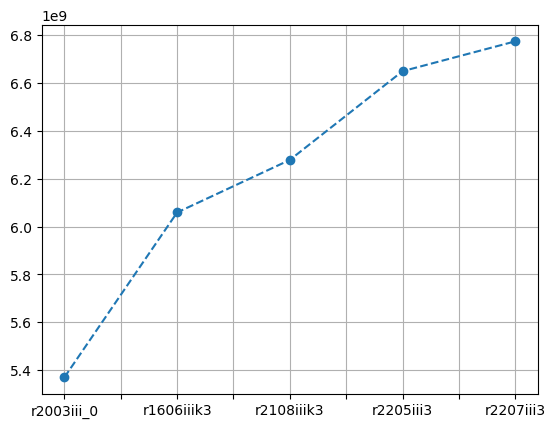

In [51]:
df_grouped_tot.sum()[1:].plot(linestyle = '--', marker = 'o')
plt.grid(True)


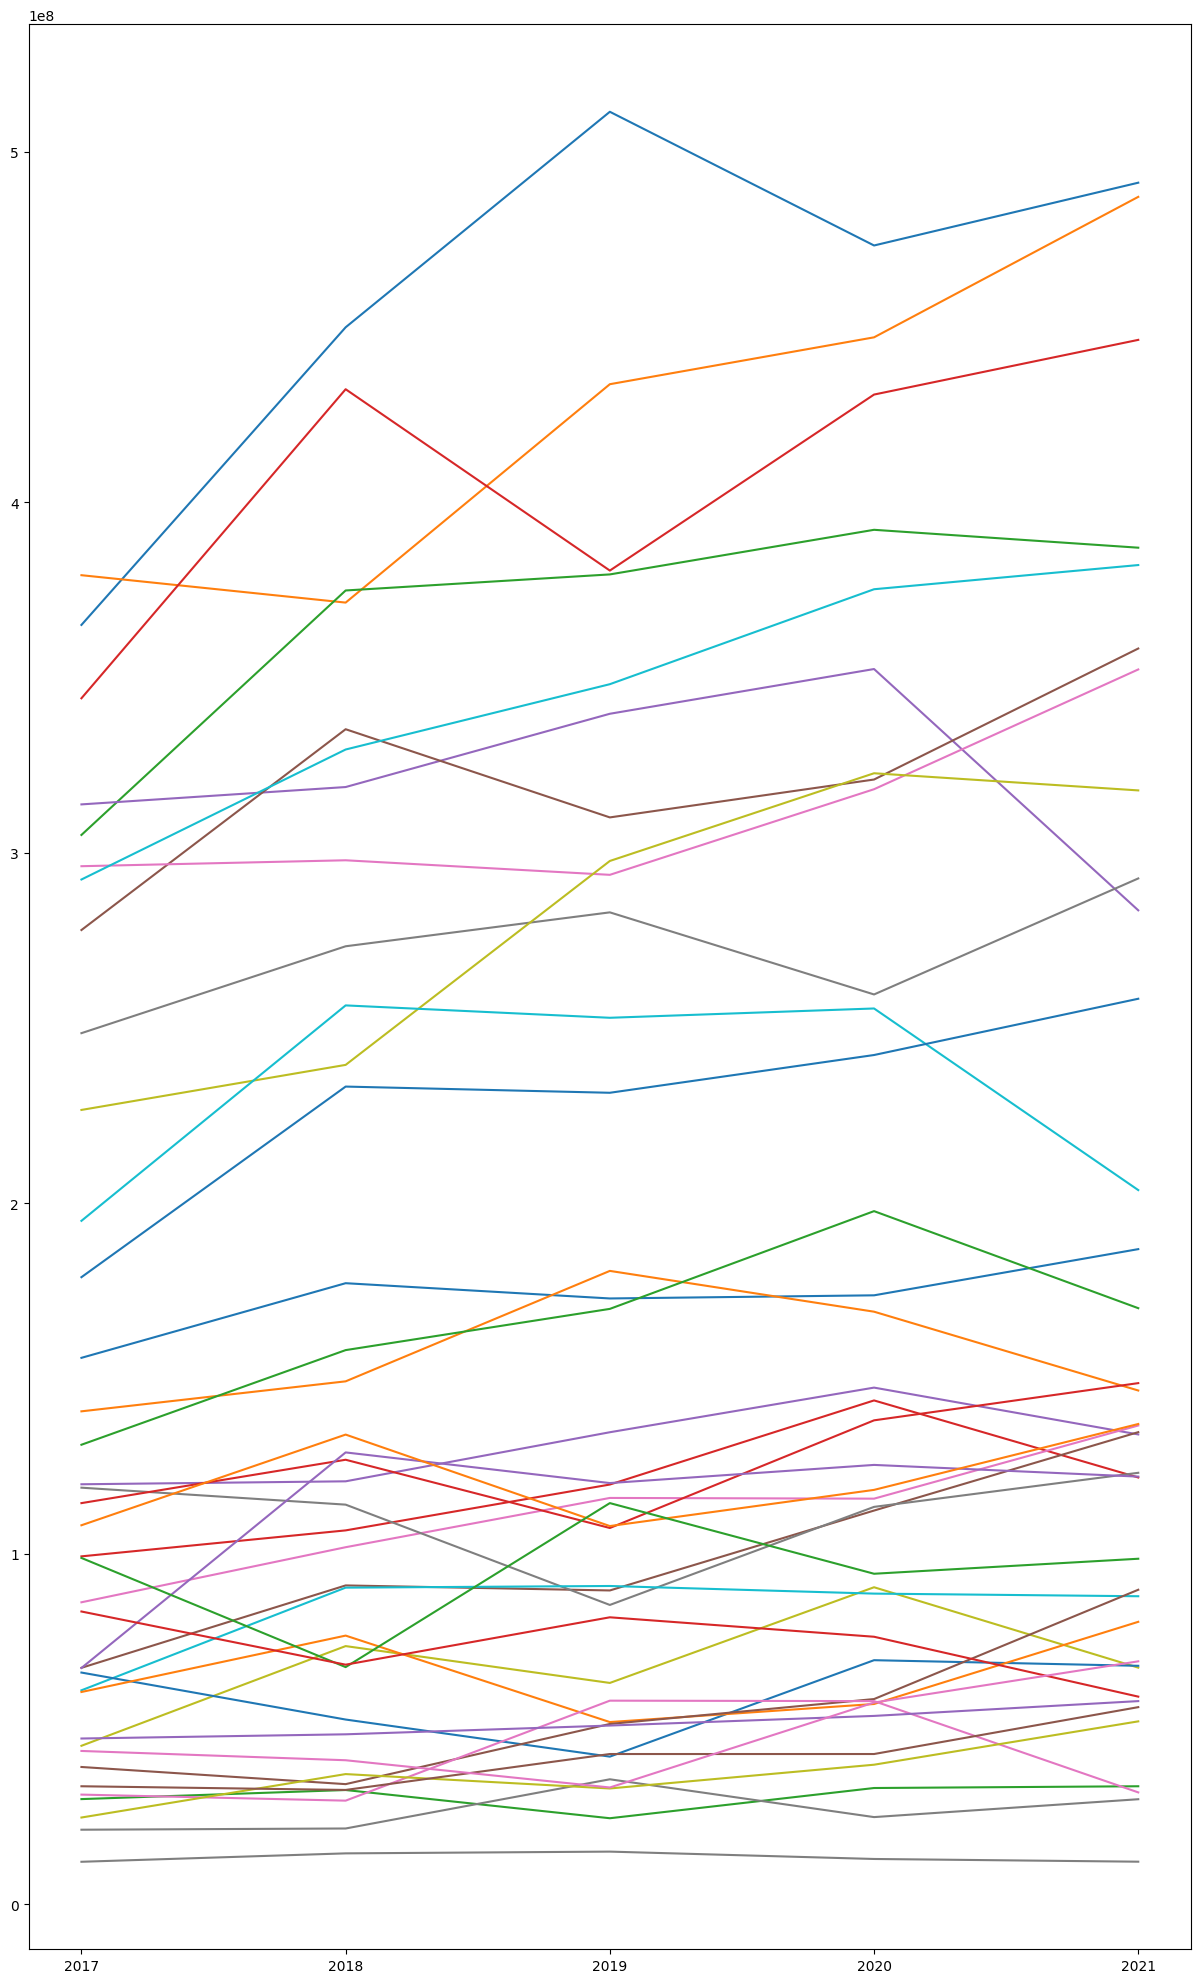

In [41]:
fig, ax = plt.subplots(figsize = (15,25))
for ind, row in df_grouped_tot.iterrows():
    if (ind <29) | (ind>35):
        plt.plot(range(2017,2022),row.values[1:])
    
plt.xticks(range(2017,2022))
plt.show()

## Check survey dates

In [37]:
#dict_dates = {16: 'r201k4_2', 17: 'rbln1',  }
for data in dict_data.keys():
    if ('kr' in data) |('rt' in data):
        if '19' in data:
            print(data)
            for col in dict_data[data].columns:
                print(col)
            #print(dict_data[data].rbln1.value_counts())
            #print(dict_data[data].rbln2.value_counts())
            #print(dict_data[data].rbln3.value_counts())
            #print(dict_data[data].rbln4.value_counts())

susenas19mar_kr.dta
r101
r102
r105
nuinfort
r1701
r1702
r1703
r1704
r1705
r1706
r1707
r1708
nuinfort1
r1801
r1802
r1803
r1804
r1805
r1806
r1807
r1808
r1809a
r1809b
r1809c
r1809d
r1809e
r1810a
r1810b
r1811a
r1811b
r1812
r1813a
r1813b
r1813c
r1813d
r1813e
r1814a
r1814b
r1815a
r1815b
r1815c
r1816
r1817
r1901a
r1901b
r1901c
r1901d
r1901e
r1901f
r1901g
r1901h
r1901i
r1901j
r2001a
r2001b
r2001c
r2001d
r2001e
r2001f
r2001g
r2001h
r2001i
r2001j
r2001k
r2001l
r2001m
r2002
r2003a
r2003b
r2003c
r2003d
r2101
r2102a_k2
r2102a_k3
r2102a_k4
r2102a_k5
r2102b_k2
r2102b_k3
r2102b_k4
r2102b_k5
r2102c_k2
r2102c_k3
r2102c_k4
r2102c_k5
r2103
r2104a
r2104b
r2104c
r2104d
r2104e
r2105
r2106
r2107a
r2107b
r2107c
r2108ik2
r2108ik3
r2108ik4
r2108iik2
r2108iik3
r2108iik4
r2108iiik2
r2108iiik3
r2108iiik4
r2109
r2110ak2
r2110ak3
r2110ak4
r2110ak5
r2110a1k2
r2110a1k3
r2110a1k4
r2110a1k5
r2110bk2
r2110bk3
r2110bk4
r2110bk5
r2110c1b2
r2110c1b3
r2110c1b4
r2110c1b5
r2110c2b2
r2110c2b3
r2110c2b4
r2110c2b5
r2110c1t2
r2110c

# Combine each year: hh + individual

In [38]:
for data in dict_data.keys():
    print(data)

susenas16mar_ki.dta
susenas16mar_kr.dta
susenas17mar_ki.dta
susenas17mar_kr.dta
susenas18mar_ki.dta
susenas18mar_kr.dta
susenas19mar_ki.dta
susenas19mar_kr.dta
kor20ind_1_diseminasi.dta
kor20ind_2_diseminasi.dta
kor20rt_diseminasi.dta
kor22rt rev20221230.dta
kor21ind_1_dds.dta
kor21ind_2_dds.dta
kor21rt_dds.dta
kor22ind_1final.dta
kor22ind_2final.dta


## 2016

In [39]:
dict_2016 = {}
for ind, row in master_cols.iterrows():
    if str(row[2016])!='nan':
        dict_2016[row[2016]] = row['Variable Code']

In [41]:
# get hh and ind data 
dataind = dict_data['susenas16mar_ki.dta']
datahh = dict_data['susenas16mar_kr.dta']
# identify same columns
same_cols = [x for x in dataind.columns if x in datahh.columns]
same_cols = [x for x in same_cols if x!= 'urut']
# merge
data_merged = pd.merge(dataind, datahh.drop(columns = same_cols), on = 'urut', how = 'outer', validate = 'many_to_one')
# get useful columns
selected_columns = [x for x in master_cols[2016].unique() if str(x)!='nan']
data_merged = data_merged[['urut'] + selected_columns]
# change names to 2020
data_merged = data_merged.rename(columns = dict_2016)
# identify new column names
selected_columns2 = [dict_2016[x] for x in selected_columns]
data_merged['year'] = 2016
data_merged[['year', 'urut'] + selected_columns2].to_stata('hh_ind_2016.dta')

## 2017 

In [43]:
dict_2017 = {}
for ind, row in master_cols.iterrows():
    if str(row[2017])!='nan':
        dict_2017[row[2017]] = row['Variable Code']

In [44]:
selected_columns

['fwt',
 'r101',
 'r102',
 'r105',
 'r711d',
 'r1605b',
 'r1605c',
 'r1605d',
 'r1605e',
 'r1605f',
 'r1701a',
 'r1701b',
 'r1701d',
 'r1701e',
 'r1701f',
 'r1701g',
 'r1701h',
 'r1701i',
 'r1701j',
 'r1701k',
 'r1701l',
 'r1901a',
 'r1901b',
 'r1901c',
 'r1608a',
 'r1608b',
 'r1608c',
 'r1608d',
 'r1608e',
 'r1609',
 'r1603',
 'r301',
 'r302',
 'r303',
 'r304',
 'r305',
 'r401',
 'r403',
 'r404',
 'r405',
 'r406a',
 'r406b',
 'r407',
 'r408',
 'r409',
 'r904a',
 'r1002b',
 'r410',
 'r903a',
 'r903b',
 'r1003a',
 'r1003b',
 'r412',
 'r507',
 'r508',
 'r509',
 'r510',
 'r513',
 'r514',
 'r515',
 'r1101a',
 'r1101b',
 'r1101c',
 'r1101d']

In [45]:
for x in data_merged.columns:
    print(x)

urut
fwt
r101
r102
r105
r1101_a
r1901a
r1901b
r1901d
r1901e
r1901j
r2001a
r2001b
r2001d
r2001e
r2001f
r2001g
r2001h
r2001i
r2001j
r2001k
r2001l
r2101a
r2101b
r2101c
r2201a2
r2201b2
r2201c2
r2201d2
r2201e2
r2202
r2207
r301
r302
r303
r304
r305
r401
r403
r404
r405
r406b
r406c
r407
r408
r409
r504
r507
r508
r601
r602
r603
r604
r605
r610
r612
r613
r614
r620
r621
r622
r702_a
r702_b
r702_c
r702_d
year


In [46]:
# get hh and ind data 
dataind = dict_data['susenas17mar_ki.dta']
datahh = dict_data['susenas17mar_kr.dta']
# identify same columns
same_cols = [x for x in dataind.columns if x in datahh.columns]
same_cols = [x for x in same_cols if x!= 'renum']
# merge
data_merged = pd.merge(dataind, datahh.drop(columns = same_cols), on = 'renum', how = 'outer', validate = 'many_to_one')
# get useful columns
selected_columns =  [x for x in master_cols[2017].unique() if str(x)!='nan']
data_merged = data_merged[['renum'] + selected_columns]
# change names to 2020
data_merged = data_merged.rename(columns = dict_2017)
# identify new column names
selected_columns2 = [dict_2017[x] for x in selected_columns]
data_merged['year'] = 2017
data_merged[['year', 'renum'] + selected_columns2].to_stata('hh_ind_2017.dta')

## 2018

In [47]:
dict_2018 = {}
for ind, row in master_cols.iterrows():
    if str(row[2018])!='nan':
        dict_2018[row[2018]] = row['Variable Code']

In [48]:
# get hh and ind data 
dataind = dict_data['susenas18mar_ki.dta']
datahh = dict_data['susenas18mar_kr.dta']
# identify same columns
same_cols = [x for x in dataind.columns if x in datahh.columns]
same_cols = [x for x in same_cols if x!= 'urut']
# merge
data_merged = pd.merge(dataind, datahh.drop(columns = same_cols), on = 'urut', how = 'outer', validate = 'many_to_one')
# get useful columns
selected_columns = [x for x in master_cols[2018].unique() if str(x)!='nan']
data_merged = data_merged[['urut']+selected_columns]
# change names to 2022
data_merged = data_merged.rename(columns = dict_2018)
# identify new column names
selected_columns2 = [dict_2018[x] for x in selected_columns]
data_merged['year'] = 2018
data_merged[['year', 'urut'] + selected_columns2].to_stata('hh_ind_2018.dta')

## 2019

In [49]:
dict_2019 = {}
for ind, row in master_cols.iterrows():
    if str(row[2019])!='nan':
        dict_2019[row[2019]] = row['Variable Code']

In [50]:
# get hh and ind data 
dataind = dict_data['susenas19mar_ki.dta']
datahh = dict_data['susenas19mar_kr.dta']
# identify same columns
same_cols = [x for x in dataind.columns if x in datahh.columns]
same_cols = [x for x in same_cols if x!= 'urut']
# merge
data_merged = pd.merge(dataind, datahh.drop(columns = same_cols), on = 'urut', how = 'outer', validate = 'many_to_one')
# get useful columns
selected_columns = [x for x in master_cols[2019].unique() if str(x)!='nan']
data_merged = data_merged[['urut'] + selected_columns]
# change names to 2022
data_merged = data_merged.rename(columns = dict_2019)
# identify new column names
selected_columns2 = [dict_2019[x] for x in selected_columns]
data_merged['year'] = 2019
data_merged[['year', 'urut'] + selected_columns2].to_stata('hh_ind_2019.dta')

## 2020

In [51]:
dict_2020 = {}
for ind, row in master_cols.iterrows():
    if str(row[2020])!='nan':
        dict_2020[row[2020]] = row['Variable Code']

In [52]:
# get hh and ind data 
dataind1 = dict_data['kor20ind_1_diseminasi.dta']
dataind1 = dataind1.drop_duplicates(keep=False)
dataind2 = dict_data['kor20ind_2_diseminasi.dta']
dataind2 = dataind2.drop_duplicates(keep=False)
datahh = dict_data['kor20rt_diseminasi.dta']

In [53]:
same_cols = [x for x in dataind1.columns if x in dataind2.columns]
same_cols = [x for x in same_cols if x not in ['renum','wi3']]
dataind = pd.merge(dataind1,dataind2.drop(columns = same_cols), on = ['renum', 'wi3'], how = 'outer', validate = 'one_to_one')
dataind = dataind[dataind.r1605lain != '222222222222222222222222']

In [55]:
# identify same columns
same_cols = [x for x in dataind.columns if x in datahh.columns]
same_cols = [x for x in same_cols if x!= 'renum']
# merge
data_merged = pd.merge(dataind, datahh.drop(columns = same_cols), on = 'renum', how = 'outer', validate = 'many_to_one')
# get useful columns
selected_columns =  [x for x in master_cols[2020].unique() if str(x)!='nan']
data_merged = data_merged[['renum'] +selected_columns]
# change names to 2022
data_merged = data_merged.rename(columns = dict_2020)
# identify new column names
selected_columns2 = [dict_2020[x] for x in selected_columns]
data_merged['year'] = 2020
data_merged[['year', 'renum'] + selected_columns2].to_stata('hh_ind_2020.dta')

## 2021

In [56]:
dict_2021 = {}
for ind, row in master_cols.iterrows():
    if str(row[2021])!='nan':
        dict_2021[row[2021]] = row['Variable Code']

In [57]:
# get hh and ind data 
dataind1 = dict_data['kor21ind_1_dds.dta']
dataind1 = dataind1.drop_duplicates(keep=False)
dataind2 = dict_data['kor21ind_2_dds.dta']
dataind2 = dataind2.drop_duplicates(keep=False)
datahh = dict_data['kor21rt_dds.dta']

In [58]:
same_cols = [x for x in dataind1.columns if x in dataind2.columns]
same_cols = [x for x in same_cols if x not in ['renum','r401']]
dataind = pd.merge(dataind1,dataind2.drop(columns = same_cols), on = ['renum', 'r401'], how = 'outer', validate = 'one_to_one')

In [59]:
# identify same columns
same_cols = [x for x in dataind.columns if x in datahh.columns]
same_cols = [x for x in same_cols if x!= 'renum']
# merge
data_merged = pd.merge(dataind, datahh.drop(columns = same_cols), on = 'renum', how = 'outer', validate = 'many_to_one')
# get useful columns
selected_columns = [x for x in master_cols[2021].unique() if str(x)!='nan']
data_merged = data_merged[['renum'] + selected_columns]
# change names to 2022
data_merged = data_merged.rename(columns = dict_2021)
# identify new column names
selected_columns2 = [dict_2021[x] for x in selected_columns]
data_merged['year'] = 2021
data_merged[['year', 'renum'] + selected_columns2].to_stata('hh_ind_2021.dta')

## 2022

In [60]:
dict_2022 = {}
for ind, row in master_cols.iterrows():
    if str(row[2022])!='nan':
        dict_2022[row['Variable Code']] = row['Variable Code']

In [61]:
# get hh and ind data 
dataind1 = dict_data['kor22ind_1final.dta']
dataind1 = dataind1.drop_duplicates(keep=False)
dataind2 = dict_data['kor22ind_2final.dta']
dataind2 = dataind2.drop_duplicates(keep=False)
datahh = dict_data['kor22rt rev20221230.dta']

In [62]:
same_cols = [x for x in dataind1.columns if x in dataind2.columns]
same_cols = [x for x in same_cols if x not in ['urut','r401']]
dataind = pd.merge(dataind1,dataind2.drop(columns = same_cols), on = ['urut', 'r401'], how = 'outer', validate = 'one_to_one')

In [63]:
# identify same columns
same_cols = [x for x in dataind.columns if x in datahh.columns]
same_cols = [x for x in same_cols if x!= 'urut']
# merge
data_merged = pd.merge(dataind, datahh.drop(columns = same_cols), on = 'urut', how = 'outer', validate = 'many_to_one')
# get useful columns
selected_columns =  [x for x in master_cols['Variable Code'].unique() if str(x)!='nan']
data_merged = data_merged[['urut'] +selected_columns]
# change names to 2022
data_merged = data_merged.rename(columns = dict_2022)
# identify new column names
selected_columns2 = [dict_2022[x] for x in selected_columns]
data_merged['year'] = 2022
data_merged[['year', 'urut'] + selected_columns2].to_stata('hh_ind_2022.dta')

# Concatenate

In [121]:
data_dict = {}
for a in [2016,2017,2018,2019,2020,2021,2022]:
    print(a)
    data = pd.read_stata('hh_ind_' + str(a) + '.dta')
    data_dict[a] = data

2016
2017
2018
2019
2020
2021
2022


In [172]:
for a in [2016,2017,2018,2019,2020,2021,2022]:
    print(a)
    if a == 2016:
        df_total = data_dict[2016]
    else:
        df_total = pd.concat([df_total,data_dict[a]], axis=0)

2016
2017
2018
2019
2020
2021
2022


In [228]:
data_dict[2019].columns

Index(['index', 'year', 'urut', 'fwt', 'r101', 'r102', 'r105', 'r1101_a',
       'r1109_a', 'r1204_a', 'r2001a', 'r2001b', 'r2001d', 'r2001e', 'r2001f',
       'r2001g', 'r2001h', 'r2001i', 'r2001j', 'r2001k', 'r2001l', 'r2001m',
       'r2002_a', 'r2002_b', 'r2002_c', 'r2002_d', 'r2101a', 'r2101b',
       'r2101c', 'r2201a2', 'r2201b2', 'r2201c2', 'r2201d2', 'r2201e2',
       'r2202', 'r2203', 'r2204a', 'r2204b', 'r2207', 'r2208b2', 'r2208b3',
       'r2208b4', 'r2208b5', 'r2208bi2', 'r2208bi3', 'r2208bi4', 'r2208bi5',
       'r2208d2', 'r2208d3', 'r2208d4', 'r2208d5', 'r2211a', 'r2211a2',
       'r2211a3', 'r2211a4', 'r2211a5', 'r2211b', 'r2211b1', 'r301', 'r302',
       'r303', 'r304', 'r305', 'r401', 'r403', 'r404', 'r405', 'r406a',
       'r406b', 'r406c', 'r407', 'r408', 'r409', 'r410', 'r503', 'r504',
       'r507', 'r508', 'r601', 'r602', 'r603', 'r604', 'r605', 'r610', 'r612',
       'r613', 'r614', 'r616', 'r617', 'r620', 'r621', 'r622', 'r701',
       'r702_a', 'r702_b', 'r7

In [229]:
data_dict[2019].r620.value_counts()

2.0    256313
3.0    105675
1.0     22616
Name: r620, dtype: int64

In [173]:
df_total[~df_total.urut.isna()].year.value_counts()

2022    1237946
2019    1204466
2018    1131825
2016    1109749
Name: year, dtype: int64

In [174]:
df_total[~df_total.renum.isna()].year.value_counts()

2021    1277497
2020    1258328
2017    1132749
Name: year, dtype: int64

# Normalization

In [175]:
# mixed type data to string 
df_total.loc[:,'r1101_a'] = df_total.r1101_a.astype(str)
df_total.loc[:,'r601'] = df_total.r601.astype(str)
df_total.loc[:,'r602'] = df_total.r602.astype(str)
df_total.loc[:,'r603'] = df_total.r603.astype(str)
df_total.loc[:,'r604'] = df_total.r604.astype(str)
df_total.loc[:,'r702_a'] = df_total.r702_a.astype(str)
df_total.loc[:,'r702_b'] = df_total.r702_b.astype(str)
df_total.loc[:,'r702_c'] = df_total.r702_c.astype(str)
df_total.loc[:,'r702_d'] = df_total.r702_d.astype(str)
df_total.loc[:,'r702_x'] = df_total.r702_x.astype(str)

In [176]:
# replace some values 
for col in ['r601','r602','r603','r604']:
    df_total.loc[:,col] =  df_total[col].replace({'nan':np.nan, '':np.nan})
    df_total.loc[:,col] =  df_total[col].astype(float)
    
df_total.loc[:,'r1101_a'] =  df_total['r1101_a'].replace({'':0, 'A':1})
df_total.loc[:,'r1101_a'] =  df_total['r1101_a'].astype(int)

In [177]:
# r2202 "_show" = 1 only if showing card
df_total.loc[:, 'r2202'] = df_total.r2202.replace({5:0})
df_total.loc[:, 'r2202_show'] = df_total.r2202.replace({2:0})
df_total.loc[:, 'r2202'] = df_total.r2202.replace({2:1})
# r404  1 = married
df_total.loc[:, 'r404'] = (df_total.r404 == 2).astype(int)
# r405 1 = female
df_total.loc[:, 'r405'] = (df_total.r405 == 2).astype(int)
# r507  9 = missing
df_total.loc[:, 'r507'] = df_total.r507.replace({9:np.nan})
# r508 1 = having (showing or not)  
df_total.loc[:, 'r508'] = df_total.r508.replace({2:1,5:0,8:0})

In [178]:
df_total.loc[:, 'r1101_a'] = df_total.r1101_a.replace({'':0, 'A':1}).astype(int)

# Drop 
for col in ['r1901a','r1901b','r1901d','r1901e','r1901j','r2001a','r2101b','r2101c','r406c','r406b','index']:
    df_total = df_total.drop(columns = col,errors = 'ignore')

# r105: 1 = urban
df_total.loc[:, 'r105'] = df_total.r105.replace({2:0}).astype(int)
# r2001b  
for col in ['r2001b','r2001d', 'r2001e', 'r2001f', 'r2001g', 'r2001h', 'r2001i', 'r2001j','r2001k',
           'r2001l', 'r2201a2', 'r2201b2','r2201c2', 'r2201d2', 'r2201e2','r2207','r408',
           'r504']:
    df_total.loc[:, col] = df_total[col].replace({5:0}).astype(float)
    
# r2101a 1 = hh member working
df_total.loc[:,'r2101a'] = (df_total.r2101a == 1).astype(int)

In [179]:
# Level of education current
dict_ed = {
    2016: {
        1 :100 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :200 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :300 ,
        10:300 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:400 ,
        16:400 ,
        17:400 ,
        18:500 ,
        19:600 ,
        20:600
    },
    
    2017: {
        1 :100 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :200 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :300 ,
        10:300 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:400 ,
        16:400 ,
        17:400 ,
        18:500 ,
        19:600 ,
        20:600
    },
    
    2018: {
        1 :100 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :200 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :300 ,
        10:300 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:400 ,
        16:400 ,
        17:400 ,
        18:500 ,
        19:600 ,
        20:600
    },

    2019: {
        1 :100 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :200 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :300 ,
        10:300 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:400 ,
        16:400 ,
        17:400 ,
        18:500 ,
        19:600 ,
        20:600 ,
        21:600
     },
    
     2020: {
        1 :100 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :200 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :300 ,
        10:300 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:400 ,
        16:400 ,
        17:400 ,
        18:500 ,
        19:600 ,
        20:600 ,
        21:600
     },
    
    2021: {
        1 :100 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :200 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :300 ,
        10:300 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:400 ,
        16:400 ,
        17:400 ,
        18:500 ,
        19:600 ,
        20:600 ,
        21:600
        },
    
    2022: {
        1 :100 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :100 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :200 ,
        10:200 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:300 ,
        16:300 ,
        17:300 ,
        18:400 ,
        19:400 ,
        20:400 ,
        21:500 ,
        22:600 ,
        23:600 ,
        24:600 
    }
    
}

for a in [2016,2017,2018,2019,2020,2021,2022]:
    print(a)
    df_total.loc[(df_total.year == a), 'r612'] = df_total.loc[(df_total.year == a), 'r612'].replace(dict_ed[a])
    df_total.loc[(df_total.year == a), 'r621'] = df_total.loc[(df_total.year == a), 'r621'].replace(dict_ed[a])
    
df_total.loc[:,'r612'] = df_total.r612/100
df_total.loc[:,'r621'] = df_total.r621/100

2016
2017
2018
2019
2020
2021
2022


In [180]:
# highest certificate (finished level of education)
dict_ed2 = {
    2016: {
        1:0 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :100 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :200 ,
        10:300 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:300 ,
        16:400 ,
        17:400 ,
        18:400 ,
        19:500 ,
        20:600,
        21:600
    },
    
    2017: {
        1:0 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :100 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :200 ,
        10:300 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:300 ,
        16:400 ,
        17:400 ,
        18:400 ,
        19:500 ,
        20:600,
        21:600
    },
    2018: {
        1:0 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :100 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :200 ,
        10:300 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:300 ,
        16:400 ,
        17:400 ,
        18:400 ,
        19:500 ,
        20:600,
        21:600
    },

    2019: {
        1:0 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :100 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :200 ,
        10:300 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:300 ,
        16:400 ,
        17:400 ,
        18:400 ,
        19:500 ,
        20:600,
        21:600,
        22:600
    },
    
     2020: {
        1 :100 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :200 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :300 ,
        10:300 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:400 ,
        16:400 ,
        17:400 ,
        18:500 ,
        19:600 ,
        20:600 ,
        21:600,
         22: 0
     },
    
     2021: {
        1 :100 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :200 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :300 ,
        10:300 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:400 ,
        16:400 ,
        17:400 ,
        18:500 ,
        19:600 ,
        20:600 ,
        21:600,
         22: 0
     },
    
     2022: {
        1 :100 ,
        2 :100  ,
        3 :100  ,
        4 :100  ,
        5 :100 ,
        6 :200 ,
        7 :200 ,
        8 :200 ,
        9 :200 ,
        10:200 ,
        11:300 ,
        12:300 ,
        13:300 ,
        14:300 ,
        15:300 ,
        16:300 ,
        17:300 ,
        18:400 ,
        19:400 ,
        20:400 ,
        21:500,
         22:600,
         23:600,
         24:600,
         25: 0
     }
    
}

for a in [2016,2017,2018,2019,2020,2021,2022]:
    print(a)
    df_total.loc[(df_total.year == a), 'r614'] = df_total.loc[(df_total.year == a), 'r614'].replace(dict_ed2[a])
    
df_total.loc[:,'r614'] = df_total.r614/100

2016
2017
2018
2019
2020
2021
2022


In [181]:
df_total.r614.value_counts()

1.0    1910008
0.0    1855068
3.0    1558623
2.0    1229645
5.0     393416
4.0     134137
6.0      28196
Name: r614, dtype: int64

In [182]:
df_total.loc[:, 'r702_a'] = df_total.r702_a.replace({'':0, 'A':1, 5:0, '5.0' :0}).astype(float)
df_total.loc[:, 'r702_b'] = df_total.r702_b.replace({'':0, 'B':1, 5:0, '5.0' :0}).astype(float)
df_total.loc[:, 'r702_c'] = df_total.r702_c.replace({'':0, 'C':1, 5:0, '5.0' :0}).astype(float)
df_total.loc[:, 'r702_d'] = df_total.r702_d.replace({'':0, 'D':1, 5:0, '5.0' :0}).astype(float)

In [183]:
# r504 r613 r614  r2207   review later 

In [184]:
# Drop 
df_total = df_total.drop(columns = ['r507  ','r508','r501  ','r611','r2206ab','r1901i','r2205aa',
                                    'r2205ab','r2205bb','nuinfobayi','nuinfort','nuinfort1','nuinfowpk',
                                    'psu'],errors = 'ignore')    

In [185]:
df_total.loc[:, 'r1109_a'] = df_total.r1109_a.replace({'':0, 'A':1}).astype(float)
df_total.loc[:, 'r1204_a'] = df_total.r1204_a.replace({'':0, 'A':1}).astype(float)

df_total.loc[:, 'r1901c'] = df_total.r1901c.replace({ 5:0}).astype(float)
df_total.loc[:, 'r1901f'] = df_total.r1901f.replace({ 5:0}).astype(float)
df_total.loc[:, 'r1901g'] = df_total.r1901g.replace({ 5:0}).astype(float)
df_total.loc[:, 'r1901h'] = df_total.r1901h.replace({ 5:0}).astype(float)
df_total.loc[:, 'r2001m'] = df_total.r2001m.replace({ 5:0}).astype(float)

df_total.loc[:, 'r2002_a'] = df_total.r2002_a.replace({'':0, 'A':1}).astype(float)
df_total.loc[:, 'r2002_b'] = df_total.r2002_b.replace({'':0, 'B':1}).astype(float)
df_total.loc[:, 'r2002_c'] = df_total.r2002_c.replace({'':0, 'C':1}).astype(float)
df_total.loc[:, 'r2002_d'] = df_total.r2002_d.replace({'':0, 'D':1}).astype(float)

df_total.loc[:, 'r2203'] = df_total.r2203.replace({ 5:0}).astype(float)
df_total.loc[:, 'r2204a'] = df_total.r2203.replace({ 5:0, 8:np.nan}).astype(float)

df_total.loc[:, 'r2204b'] = df_total.r2203.replace({ 5:0, 8:np.nan}).astype(float)

df_total.loc[:, 'r2206aa'] = df_total.r2206aa.replace({ 5:0}).astype(float)

In [186]:
# for a in [2016,2018,2019,2020,2021,2022]:
#     print(a)
#     df_total.loc[(df_total.year == a), 'r614'] = df_total.loc[(df_total.year == a), 'r614'].replace(dict_ed[a])
#     
# df_total.loc[:,'r614'] = df_total.r614/100
# 
# df_total.loc[:,'r614'] = df_total.r614.replace({0.21:6})
# df_total.loc[(df_total.year == 2019), 'r614'] = df_total.loc[(df_total.year == 2019), 'r614'].replace({0.22:6})
# df_total.loc[(df_total.year.isin([2020,2021])), 'r614'] = df_total.loc[(df_total.year.isin([2020,2021])), 'r614'].replace({0.22:1})
# df_total.loc[(df_total.year == 2022), 'r614'] = df_total.loc[(df_total.year == 2022), 'r614'].replace({0.25:1})

In [187]:
for col in ['r2211b','r616','r617','r701','r2208d2','r2208d3','r2208d4', 'r2208d5','r2205ba', 'r2211a']:
    df_total.loc[:, col] = df_total[col].replace({5:0}).astype(float)

# drop 
df_total = df_total.drop(columns = ['r406a','r702_x','r703','r2204c_g','r506','r509','r501'], errors= 'ignore')

df_total.loc[:, 'r2204c_a'] = df_total.r2204c_a.replace({'':0, 'A':1}).astype(float)
df_total.loc[:, 'r2204c_b'] = df_total.r2204c_b.replace({'':0, 'B':1}).astype(float)
df_total.loc[:, 'r2204c_c'] = df_total.r2204c_c.replace({'':0, 'C':1}).astype(float)
df_total.loc[:, 'r2204c_d'] = df_total.r2204c_d.replace({'':0, 'D':1}).astype(float)
df_total.loc[:, 'r2204c_e'] = df_total.r2204c_e.replace({'':0, 'E':1}).astype(float)
df_total.loc[:, 'r2204c_f'] = df_total.r2204c_f.replace({'':0, 'F':1}).astype(float)

In [188]:
# drop 
df_total = df_total.drop(columns = ['r1901c','r1901f','r1901g','r1901h'] , errors= 'ignore')
df_total.loc[:, 'r616'] = df_total['r616'].replace({2:1})


In [189]:
for col in df_total.columns:
    print('\n',col, ' : ', master_cols.loc[master_cols['Variable Code'] == col ,'Label'].values)
    if col != 'year':
        print(df_total[col].unique())
        print(df_total[['year',col]].groupby(['year'], as_index=False).mean())


 year  :  []

 urut  :  []
[1.10100001e+08 1.10100002e+08 1.10100003e+08 ... 3.39678000e+05
 3.39679000e+05 3.39680000e+05]
   year          urut
0  2016  4.286363e+08
1  2017           NaN
2  2018  1.497116e+05
3  2019  1.603878e+05
4  2020           NaN
5  2021           NaN
6  2022  1.670717e+05

 fwt  :  [nan]
[ 68.6703949   31.79739761 117.03599548 ...  75.72105348 176.24874614
 158.11869516]
   year         fwt
0  2016  232.386171
1  2017  230.493031
2  2018  233.455489
3  2019  221.929523
4  2020  214.821119
5  2021  212.591321
6  2022  221.499238

 r101  :  ['province']
[11. 12. 13. 14. 15. 16. 17. 18. 19. 21. 31. 32. 33. 34. 35. 36. 51. 52.
 53. 61. 62. 63. 64. 65. 71. 72. 73. 74. 75. 76. 81. 82. 91. 94.]
   year       r101
0  2016  42.645997
1  2017  42.669483
2  2018  42.731938
3  2019  44.120126
4  2020  43.781410
5  2021  43.863456
6  2022  43.886134

 r102  :  ['district/city']
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 71. 72. 73. 74. 75. 

[nan  1.  0.]
   year      r408
0  2016  0.971781
1  2017  0.968349
2  2018  0.969662
3  2019  0.967668
4  2020  0.970325
5  2021  0.972605
6  2022  0.976340

 r409  :  ['Age of first marriage']
[21. nan 34. 18. 19. 17. 23. 22. 25. 27. 26. 24. 20. 16. 29. 30. 28. 39.
 37. 36. 31. 35. 33. 32. 49. 38. 13. 44. 40. 43. 15. 57. 46. 14. 47. 45.
 11. 12. 42. 41. 69. 68. 55. 50. 65. 56. 72. 48. 66. 60. 54. 61. 53. 51.
 10. 80. 58. 63. 52. 67. 71. 62. 73. 64. 78. 70. 76. 74. 59. 79. 75. 98.
 77. 91.  9.  8.  7. 88. 82. 97. 87. 81.]
   year       r409
0  2016  22.565719
1  2017  22.546078
2  2018  22.695792
3  2019  22.633372
4  2020  22.746889
5  2021  22.766757
6  2022  22.828720

 r504  :  ['Do you have a National Identity Number (NIK)?']
[nan  1.  0.]
   year      r504
0  2016  0.777654
1  2017  0.955929
2  2018  0.917733
3  2019  0.933420
4  2020  0.942816
5  2021  0.949996
6  2022  0.961890

 r507  :  ['NIK data source']
[ 1.  2. nan  3.]
   year      r507
0  2016  1.491095
1  2017  1.5885

[nan  0.  1.]
   year      r616
0  2016       NaN
1  2017  0.132193
2  2018  0.142609
3  2019  0.133457
4  2020  0.123408
5  2021  0.114202
6  2022  0.093203

 r617  :  ['Did you get the Smart Indonesia Program (PIP)?']
[nan  0.  1.]
   year      r617
0  2016       NaN
1  2017  0.121354
2  2018  0.141190
3  2019  0.129001
4  2020  0.123601
5  2021  0.118349
6  2022  0.097248

 r618  :  ['What is the amount of PIP money received?']
[     nan       0.  290000.  900000.  450000. 1050000.  700000.  350000.
  200000. 1200000.  800000.  400000.  600000.  150000.   50000.  250000.
 1000000.  850000.  820000.  425000.  225000.  560000.  240000.  360000.
 1350000. 2400000. 1600000.  950000.  675000. 1125000.  670000.  300000.
  470000.  245000.  220000.   65000.  100000.  500000.  880000.  270000.
  260000. 1500000.  430000.  380000.  750000.  650000.  160000.  575000.
  265000.  280000. 1450000.  570000. 1300000.   80000.  130000.  340000.
  232000.   60000.  375000. 1800000.  550000.  325000.

[     nan   55000.   50000.    8000.   54000.   52000.   71000.   60000.
   68200.  110000.  120000.   70000.  125000.   68000.   80000.  100000.
   85000.   46000.   48000.   40000.   65000.   78000.   91000.   87500.
   90000.   32500.   25000.   84000.   62500.  168000.   77000.   44000.
   66000.  150000.   63000.   62000.  880000.  109000.  330000.  990000.
  813000.  715000.  114000.   86000.   56000.  138000.   61000.   35000.
   30000.   37500.   95000.   45000.   15000.   75000.   98000.  500000.
   47500.   64000.  240000.       0.   12000.  113000.   84500.  200000.
   53000.  220000.  182500.   88000.   58000.   86300.   82000.  600000.
   96000.   81000.   69000.  104000.   97000.   87000.   92000.   73000.
   36000.   10000.   66500.  126000.   13000.  102500.   38000.   97500.
   92500.  195000.   82500.  165000.  102400.   78400.   76000.   95500.
  180000.  108000.   94000.   62100.   93000.   96500.   98400.   99000.
  112500.  187500.  250000.  270000.  440000.  1350

[     nan   50000.   24000.  165000.   55000.  110000.  220000.   60000.
  120000.   70000.  125000.   68000.   80000.  290000.   85000.   46000.
   48000.  320000.  200000.   65000.   78000.  260000.  650000.  100000.
   86000.  160000.  480000.  330000.   90000.  300000.   97500.  275000.
   66000.   63000.   62000.   62500.  920000.   40000.   74000.  250000.
  112000.    8000.   61000.   35000.   30000.   54000.   75000.  122000.
   37500.   95000.   45000.   15000.  174000.   85500.   47500.   98000.
   77000.  154000.   25000.       0.  150000.   53000.   96000.  187500.
  182500.  182000.   84000.   88000.  155000.  130000.  440000.   20000.
  128000.  132000.  133000.   58000.   82000.   81000.   87000.   87500.
   91000.  600000.  360000.   92000.   10000.  105000.  140000.  185000.
  780000.  145000.  180000.  800000.  190000.   12000.  175000.   72000.
   83000.   76000.   99000.  137500.   94000.   62100.  450000.  181000.
   71000.  168000.   97000.   93000.  194000.   965

[        nan 0.00000e+00 5.00000e+05 1.20000e+06 6.00000e+05 5.00000e+04
 3.00000e+05 2.00000e+05 2.80000e+06 3.00000e+06 2.40000e+06 9.00000e+05
 1.80000e+06 4.00000e+05 2.50000e+05 1.50000e+06 1.50000e+05 1.60000e+06
 2.00000e+06 1.35000e+06 7.00000e+04 1.25000e+06 1.85000e+06 2.70000e+06
 1.00000e+06 3.40000e+06 2.50000e+06 7.00000e+05 7.50000e+05 1.00000e+05
 4.50000e+05 6.00000e+04 1.17500e+06 1.70000e+06 3.60000e+06 8.00000e+05
 8.80000e+05 8.50000e+05 8.90000e+05 3.50000e+05 2.35000e+06 2.20000e+06
 1.89000e+06 1.38000e+06 1.24000e+06 1.17000e+06 1.45500e+06 1.90000e+06
 2.48000e+06 8.20000e+05 2.30000e+06 1.60000e+05 2.17300e+06 1.62500e+06
 1.22400e+06 2.25000e+06 1.10000e+06 1.40000e+06 1.05000e+06 6.00000e+06
 1.30000e+06 2.10000e+06 1.44000e+06 7.50000e+04 4.32000e+06 3.50000e+06
 2.28000e+06 2.08000e+06 2.60000e+06 9.20000e+05 2.80000e+05 3.08000e+06
 4.53600e+06 4.80000e+06 9.50000e+05 2.49000e+06 2.30000e+05 5.45000e+06
 4.00000e+06 7.95000e+05 2.76600e+06 2.41000e+06 1.

[nan  1.  0.  2.  3.  4.  5.  6.  7.  8.  9.]
   year      r502
0  2016       NaN
1  2017       NaN
2  2018       NaN
3  2019       NaN
4  2020  1.117628
5  2021  1.101204
6  2022  1.084367

 r619  :  ['For admission how many semesters?']
[nan  2.  1.  3.  4.  6.  5.]
   year      r619
0  2016       NaN
1  2017       NaN
2  2018       NaN
3  2019       NaN
4  2020  1.785603
5  2021  1.856983
6  2022  1.513849

 r2201a3  :  ['How many household members have/receive pension/veteran insurance?']
[nan  1.  3.  2.  4.  6.  5.  7.  8. 10.]
   year   r2201a3
0  2016       NaN
1  2017       NaN
2  2018       NaN
3  2019       NaN
4  2020       NaN
5  2021  1.331680
6  2022  1.321841

 r2201b3  :  ['How many household members have/receive old age insurance?']
[nan  1.  2.  4.  3.  5.  6.  7.  8. 10.]
   year   r2201b3
0  2016       NaN
1  2017       NaN
2  2018       NaN
3  2019       NaN
4  2020       NaN
5  2021  1.336949
6  2022  1.331739

 r2201c3  :  ['How many household members have/recei

In [190]:
for col in df_total.columns:
    print(col)
    df_total[col] = pd.to_numeric( df_total[col])

year
urut
fwt
r101
r102
r105
r1101_a
r2001b
r2001d
r2001e
r2001f
r2001g
r2001h
r2001i
r2001j
r2001k
r2001l
r2101a
r2201a2
r2201b2
r2201c2
r2201d2
r2201e2
r2202
r2207
r301
r302
r303
r304
r305
r401
r403
r404
r405
r407
r408
r409
r504
r507
r601
r602
r603
r604
r605
r610
r612
r613
r614
r620
r621
r622
r702_a
r702_b
r702_c
r702_d
renum
r1109_a
r1204_a
r2001m
r2002_a
r2002_b
r2002_c
r2002_d
r2203
r2204a
r503
r616
r617
r618
r2204b
r2208a2
r2208a3
r2208a4
r2208a5
r2208b2
r2208b3
r2208b4
r2208b5
r2208bi2
r2208bi3
r2208bi4
r2208bi5
r2211a
r2211a2
r2211a3
r2211a4
r2211a5
r2211b
r2211b1
r410
r701
r2208d2
r2208d3
r2208d4
r2208d5
r2204c_a
r2204c_b
r2204c_c
r2204c_d
r2204c_e
r2211a1
r502
r619
r2201a3
r2201b3
r2201c3
r2201d3
r2201e3
r2204c_f
r2205ba
r2208c2
r2208c3
r2208c4
r2208c5
r2206aa
r2202_show


# Add poverty

In [191]:
poverty_rate = pd.read_excel('master_2022_TRANSLATED_selected_variables.xlsx', sheet_name= 'poverty')

In [192]:
poverty_rate = poverty_rate.rename(columns = {'Year':'year', 'value_prov': 'r101', 'dist_code':'r102'})
df_total = pd.merge(df_total, poverty_rate, on =['year','r101','r102'], how = 'left', validate = 'many_to_one')
df_total = df_total[~df_total.year.isna()]

In [193]:
df_total.to_stata('hh_ind_2016_to_2022.dta')
#df_total = pd.read_csv('hh_ind_2016_to_2022.csv', encoding= 'unicode_escape')

# TESTS

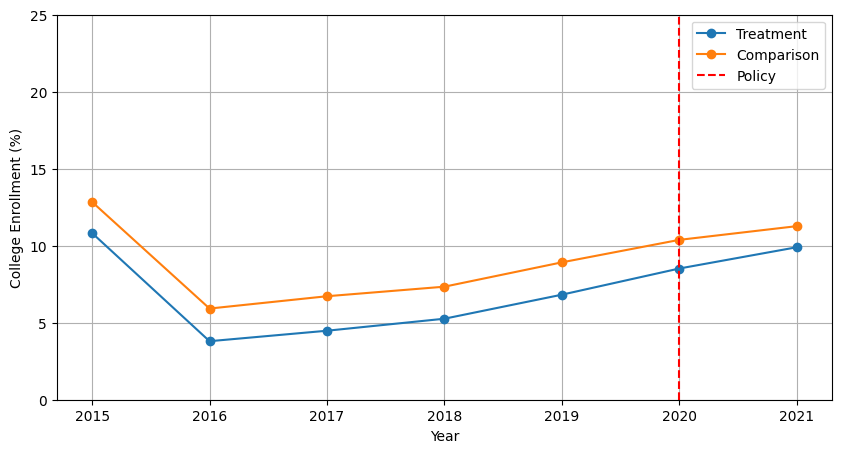

In [194]:
C = [12.84    ,     5.92 ,      6.72   ,    7.34 ,      8.92   ,   10.38 ,     11.27  ]
T = [  10.82  ,     3.80 ,      4.48   ,    5.26 ,      6.82   ,    8.52 ,      9.90 ]
fig,ax = plt.subplots(figsize = (10,5))

X = [x -1 for x in [2016,2017, 2018,2019,2020,2021,2022]] 
ax.plot(X,T, label = 'Treatment', marker = 'o')
ax.plot(X, C, label = 'Comparison', marker = 'o')
ax.axvline(x = 2020, color = 'red', label = 'Policy', linestyle = '--')
ax.legend()
plt.ylim([0,25])
plt.grid()
plt.xlabel('Year')
plt.ylabel('College Enrollment (%)')
plt.savefig('did_visual.png',dpi=200)
plt.show()

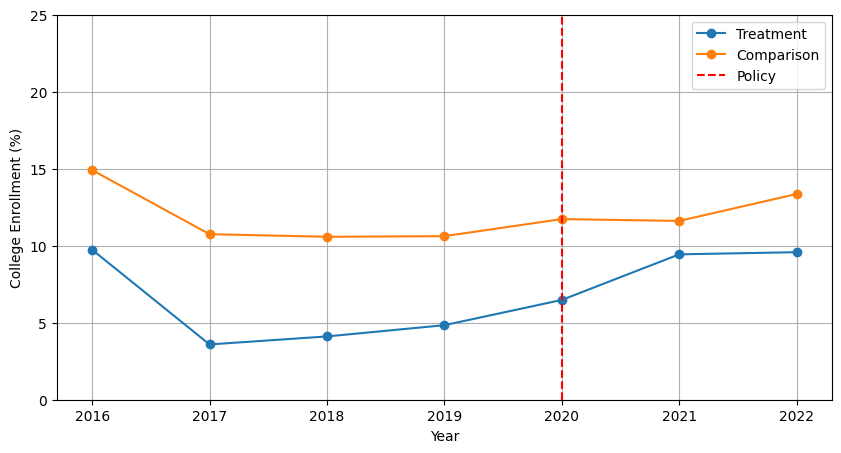

In [195]:
fig,ax = plt.subplots(figsize = (10,5))
C = [ 14.91 ,    10.75  ,    10.58 ,     10.62  ,    11.73,      11.61,      13.36 ]
T = [ 9.74  ,    3.59   ,    4.11  ,     4.84   ,    6.48 ,      9.44 ,      9.58 ]

X = [2016,2017, 2018,2019,2020,2021,2022] 
ax.plot(X,T, label = 'Treatment', marker = 'o')
ax.plot(X, C, label = 'Comparison', marker = 'o')
ax.axvline(x = 2020, color = 'red', label = 'Policy', linestyle = '--')
ax.legend()
plt.ylim([0,25])
plt.grid()
plt.xlabel('Year')
plt.ylabel('College Enrollment (%)')
plt.savefig('did_visual.png',dpi=200)
plt.show()

# Descriptibe table

In [196]:
df_total.loc[:,'N'] = 1
df_total.loc[:,'target_age_group']  = ((df_total.r407 >= 17) & (df_total.r407 <= 22)).astype(int)
df_total.loc[:,'in_college']  =  (df_total.r612 == 5).astype(int)
df_total_table = df_total[(df_total.target_age_group == 1)]

df_total_table = df_total_table.rename(columns = {'r407':'Age','r616':'get_program', 'r405': 'Female',
                                                  'r105':'Urban','r404':'Married'})

df_total_table.loc[:,'get_program'] =  df_total_table.get_program.fillna(0)


for col in ['Female', 'in_college','get_program','Urban', 'Married']:
    df_total_table.loc[:,col] = np.round(100*df_total_table[col],2)

df_total_table[['year', 'N','Female', 'in_college','Age','get_program',
                'Urban', 'Married']].groupby(['year'], as_index=False).agg({'N': 'sum',
                                                                            'Female':'mean',
                                                                            'in_college': 'mean',
                                                                            'Age':'mean',
                                                                            'get_program':'mean',
                                                                            'Urban': 'mean',
                                                                            'Married':'mean'}).T.to_excel('descriptive_DiD.xlsx')

# ViZ

In [197]:
# gen amount_of_programs = ( r1101_a == 1) + (r2202 == 1) + (r2203 == 1) + (r2207 == 1)
# 
# gen target_age_group = 0
# replace target_age_group = 1 if inlist(r407, 17,18,19)
# 
# keep if target_age_group == 1
# 	
# gen TREAT = 0
# replace TREAT = 1 if amount_of_programs>3
# replace TREAT = 1 if (amount_of_programs>=2) & inlist(year,2016,2018)
# 
# gen in_collge = 0
# replace in_collge = 1 if r612 == 5
# 
# gen TREATxT = TREAT*T
# 
# * search  (r2001a == 1)  + 
# gen poverty_index = (r2001b == 1) + (r2001d == 1) + (r2001e == 1) + (r2001f == 1) + (r2001g == 1)+(r2001h==1)+(r2001i==1)+(r2001j==1)+(r2001k==1)+(r2001l==1)+(r2001m==1)
# 
# drop if r614 >=4

In [199]:
df_total.loc[:,'target_age_group']  = ((df_total.r407 >= 17) | (df_total.r407 <= 22)).astype(int)
df_total.loc[:,'in_college']  =  (df_total.r612 == 5).astype(int)
df_total_viz = df_total[(df_total.target_age_group == 1) & (df_total.in_college==1)]
df_total_viz.loc[:,'r616'] =  df_total_viz.r616.fillna(0)

C:\Users\JoaquinFarina\AppData\Local\Temp\ipykernel_10184\1605624629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_viz.loc[:,'r616'] =  df_total_viz.r616.fillna(0)


In [ ]:
df_viz_district =  df_total_viz[['r102','year','poverty_rate','r616']].groupby(['r102','year'], as_index=False).mean()


In [ ]:
df_viz_district_wide=pd.pivot(df_viz_district, index=['r102'], columns = 'year',values = ['r616', 'poverty_rate']) #Reshape from long to wide

#Re-arange the new columns in the correct order
#cols = df['Year Month'].unique()
#df_wide=df_wide[cols]

# Add Income

In [ ]:
# load previous data 
#df_total = pd.read_stata('hh_ind_2016_to_2022.dta')

In [200]:
path_income = r'C:\Users\JoaquinFarina\OneDrive - Teachers College, Columbia University\Desktop\TC\2 - Spring2023\EDPA 6002 QUANT\FinalProject\Data\Kapita Data'
dict_kapita = {}

## 2016

In [201]:
#susenas16mar_41.dta
#12151507
#Index(['r101', 'r102', 'r105', 'r107', 'r108', 'r301', 'kode', 'klp', 'b41k5',
#       'b41k6', 'weind', 'wert', 'kalori', 'protein', 'lemak', 'karbo',
#       'urut'],
#      dtype='object')
#
#susenas16mar_42.dta
#10367765
#Index(['r101', 'r102', 'r105', 'r107', 'r108', 'r301', 'kode', 'klp', 'b42k3',
#       'b42k4', 'b42k5', 'sebulan', 'weind', 'wert', 'urut'],
#      dtype='object')
#
#susenas16mar_43.dta
#291414
#Index(['r101', 'r102', 'r105', 'r107', 'r108', 'r301', 'food', 'nfood',
#       'expend', 'kapita', 'weind', 'wert', 'kalori', 'protein', 'lemak',
#       'karbo', 'urut'],
#      dtype='object')

In [202]:
a = 2016
dict_kapita[a] = [pd.read_stata( path_income + r'\{}\susenas16mar_43.dta'.format(a), columns = ['urut', 'kapita'])]

## 2017

In [203]:
#susenas17mar_41.dta
#14323773
#Index(['r101', 'r102', 'r105', 'r203', 'r301', 'klp', 'kode', 'coicop',
#       'b41k5', 'b41k6', 'b41k7', 'b41k8', 'b41k9', 'b41k10', 'kalori',
#       'protein', 'lemak', 'karbo', 'wert', 'weind', 'renum'],
#      dtype='object')
#
#susenas17mar_42.dta
#11256538
#Index(['r101', 'r102', 'r105', 'r203', 'r301', 'klp', 'kode', 'coicop',
#       'b42k3', 'b42k4', 'b42k5', 'sebulan', 'wert', 'weind', 'renum'],
#      dtype='object')
#
#susenas17mar_43.dta
#297276
#Index(['r101', 'r102', 'r105', 'r203', 'r301', 'food', 'nfood', 'expend',
#       'kapita', 'kalori', 'protein', 'lemak', 'karbo', 'wert', 'weind',
#       'renum'],
#      dtype='object')

In [204]:
a = 2017
dict_kapita[a] = [pd.read_stata( path_income + r'\{}\susenas17mar_43.dta'.format(a), columns = ['renum', 'kapita'])]

## 2018

In [205]:
#susenas18mar_41.dta
#14090740
#Index(['r101', 'r102', 'r105', 'r203', 'r301', 'coicop', 'klp', 'kode',
#       'b41k5', 'b41k6', 'b41k7', 'b41k8', 'b41k9', 'b41k10', 'kalori',
#       'protein', 'lemak', 'karbo', 'wert', 'weind', 'kabu', 'urut', 'wi',
#       'wi2', 'wi3'],
#      dtype='object')

#susenas18mar_42.dta
#11860966
#Index(['r101', 'r102', 'r105', 'r203', 'r301', 'klp', 'kode', 'b42k3', 'b42k4',
#       'b42k5', 'b42k3a', 'b42k3b', 'b42k3c', 'b42k3d', 'b42k3e', 'sebulan',
#       'wert', 'weind', 'kabu', 'wi2', 'wi3', 'urut'],
#      dtype='object')

#susenas18mar_43.dta
#295155
#Index(['r101', 'r102', 'r105', 'r203', 'r301', 'food', 'nonfood', 'expend',
#       'kapita', 'kalori_kap', 'prote_kap', 'lemak_kap', 'karbo_kap', 'wert',
#       'weind', 'kabu', 'wi2', 'wi3', 'urut'],
#      dtype='object')

In [206]:
a = 2018
dict_kapita[a] = [pd.read_stata( path_income + r'\{}\susenas18mar_43.dta'.format(a), columns = ['urut', 'kapita'])]

## 2019

In [207]:
#susenas19mar_41.dta
#15271884
#Index(['r101', 'r102', 'r105', 'r203', 'r301', 'coicop', 'klp', 'kode',
#       'b41k5', 'b41k6', 'b41k7', 'b41k8', 'b41k9', 'b41k10', 'kalori',
#       'protein', 'lemak', 'karbo', 'wert', 'weind', 'wi', 'wi1', 'wi2',
#       'urut'],
#      dtype='object')
#
#susenas19mar_42.dta
#13035008
#Index(['r101', 'r102', 'r105', 'r203', 'r301', 'coicop', 'klp', 'kode',
#       'b42k3', 'b42k4', 'b42k5', 'b42k3a', 'b42k3b', 'b42k3c', 'b42k3d',
#       'b42k3e', 'sebulan', 'wert', 'weind', 'wi', 'wi1', 'wi2', 'renum'],
#      dtype='object')
#
#susenas19mar_43.dta
#315672
#Index(['r101', 'r102', 'r105', 'r203', 'r301', 'food', 'nonfood', 'expend',
#       'kapita', 'kalori_kap', 'prote_kap', 'lemak_kap', 'karbo_kap', 'wert',
#       'weind', 'wi', 'wi1', 'wi2', 'renum'],
#      dtype='object')

In [208]:
a = 2019
dict_kapita[a] = [pd.read_stata( path_income + r'\{}\susenas19mar_43.dta'.format(a), columns = ['renum', 'kapita'])]

## 2020

In [209]:
#kor20ind_1_diseminasi.dta
#1258328
#Index(['R101', 'R102', 'R105', 'R401', 'R403', 'R404', 'R405', 'R406A',
#       'R406B', 'R406C',
#       ...
#       'R1207', 'R1208', 'psu', 'ssu', 'strata', 'fwt', 'WI1', 'WI2', 'WI3',
#       'renum'],
#      dtype='object', length=155)
#
#kor20ind_2_diseminasi.dta
#944060
#Index(['R101', 'R102', 'R105', 'R401', 'R1301', 'R1302', 'R1303_A', 'R1303_B',
#       'R1303_C', 'R1303_D',
#       ...
#       'R1608', 'R1609', 'psu', 'ssu', 'strata', 'fwt', 'WI1', 'WI2', 'WI3',
#       'renum'],
#      dtype='object', length=156)
#
#kor20rt_diseminasi.dta
#334229
#Index(['R101', 'R102', 'R105', 'nuinfort', 'R1701', 'R1702', 'R1703', 'R1704',
#       'R1705', 'R1706',
#       ...
#       'R304', 'R305', 'psu', 'ssu', 'strata', 'fwt', 'WI1', 'WI2', 'WI3',
#       'renum'],
#      dtype='object', length=239)

In [210]:
a = 2020
dict_kapita[a] = [pd.read_stata( path_income + r'\{}\susenas20mar_43.dta'.format(a), columns = ['urut', 'kapita'])]

## 2021

In [211]:
# sebulan

In [212]:
#blok42_11_31.dta
#4262701
#Index(['renum', 'R101', 'R102', 'R105', 'R203', 'R301', 'klp', 'kode',
#       'coicop', 'B42K3', 'B42K4', 'B42K5', 'B42K3A', 'B42K3B', 'B42K3C',
#       'B42K3D', 'B42K3E', 'sebulan', 'wert', 'weind', 'WI1', 'WI2'],
#      dtype='object')
#
#blok42_32_36.dta
#4244286
#Index(['renum', 'R101', 'R102', 'R105', 'R203', 'R301', 'klp', 'kode',
#       'coicop', 'B42K3', 'B42K4', 'B42K5', 'B42K3A', 'B42K3B', 'B42K3C',
#       'B42K3D', 'B42K3E', 'sebulan', 'wert', 'weind', 'WI1', 'WI2'],
#      dtype='object')
#
#blok42_51_94.dta
#5551570
#Index(['renum', 'R101', 'R102', 'R105', 'R203', 'R301', 'klp', 'kode',
#       'coicop', 'B42K3', 'B42K4', 'B42K5', 'B42K3A', 'B42K3B', 'B42K3C',
#       'B42K3D', 'B42K3E', 'sebulan', 'wert', 'weind', 'WI1', 'WI2'],
#      dtype='object')

In [213]:
a = 2021
dict_kapita[a] = [pd.read_stata( path_income + r'\{}\blok43.dta'.format(a), columns = ['renum', 'kapita'])]

In [214]:
dict_kapita[a]

[         renum        kapita
 0       285340  7.445286e+05
 1       285346  7.441324e+05
 2       285337  9.615167e+05
 3       285334  1.176473e+06
 4       285331  9.789158e+05
 ...        ...           ...
 340027   10746  1.798267e+06
 340028   10752  2.806473e+06
 340029   10755  1.541948e+06
 340030   10761  1.139516e+06
 340031   10764  1.518851e+06
 
 [340032 rows x 2 columns]]

## 2022

In [215]:
#blok43_11_31.dta
#101903
#Index(['urut', 'strata', 'psu', 'ssu', 'WI1', 'WI2', 'R101', 'R102', 'R105',
#       'R203', 'R301', 'food', 'nonfood', 'expend', 'kapita', 'KALORI_KAP',
#       'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP', 'wert', 'weind'],
#      dtype='object')
#
#blok43_32_36.dta
#99238
#Index(['urut', 'strata', 'psu', 'ssu', 'WI1', 'WI2', 'R101', 'R102', 'R105',
#       'R203', 'R301', 'food', 'nonfood', 'expend', 'kapita', 'KALORI_KAP',
#       'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP', 'wert', 'weind'],
#      dtype='object')
#
#blok43_51_94.dta
#138443
#Index(['urut', 'strata', 'psu', 'ssu', 'WI1', 'WI2', 'R101', 'R102', 'R105',
#       'R203', 'R301', 'food', 'nonfood', 'expend', 'kapita', 'KALORI_KAP',
#       'PROTE_KAP', 'LEMAK_KAP', 'KARBO_KAP', 'wert', 'weind'],
#      dtype='object')

In [216]:
a = 2022
dict_kapita[a] = [pd.read_stata( path_income + r'\{}\blok43_11_31.dta'.format(a), columns = ['urut', 'kapita']),
                 pd.read_stata( path_income + r'\{}\blok43_32_36.dta'.format(a), columns = ['urut', 'kapita']),
                 pd.read_stata( path_income + r'\{}\blok43_51_94.dta'.format(a), columns = ['urut', 'kapita'])]

## Merge

In [217]:
for k in range(2016,2023):
    print(k)
    list_data_a = dict_kapita[k]
    
    # Concatenate df for each year         
    for j in range(len(list_data_a)):
        data = list_data_a[j]
        if j == 0:
            data_tot_a = data.copy()
        else:
            data_tot_a = pd.concat([data_tot_a, data])
            
    # Compute income decile at HH level
    data_tot_a.loc[:,'kapita_decile_hh'] = pd.qcut(data_tot_a['kapita'], 10, labels = False) + 1

    # 2020 and 2019 have different column name for hh  identifier
    if k == 2020:
        data_tot_a = data_tot_a.rename(columns = {'urut':'renum'})
    if k == 2019:
        data_tot_a = data_tot_a.rename(columns = {'renum':'urut'})
    
    # Merge income and full dataframe and concatenate
    if k == 2016:
        data_tot_with_kapita = pd.merge(df_total[df_total.year == k], data_tot_a, on = [dict_merge_key[k]], how ='left', validate='many_to_one')
    else:
        data_tot_with_kapita_a = pd.merge(df_total[df_total.year == k], data_tot_a, on = [dict_merge_key[k]], how ='left', validate='many_to_one')
        data_tot_with_kapita = pd.concat([data_tot_with_kapita, data_tot_with_kapita_a])


2016
2017
2018
2019
2020
2021
2022


In [218]:
# Show median income per year
data_tot_with_kapita[['kapita','year']].groupby(['year']).median()

,kapita
year,
2016,686350.000000
2017,748254.421769
2018,799842.625000
2019,834389.875000
2020,884076.187500
2021,895401.785714
2022,960883.928571


In [219]:
# print columns
for x in data_tot_with_kapita.columns:
    print(x)

year
urut
fwt
r101
r102
r105
r1101_a
r2001b
r2001d
r2001e
r2001f
r2001g
r2001h
r2001i
r2001j
r2001k
r2001l
r2101a
r2201a2
r2201b2
r2201c2
r2201d2
r2201e2
r2202
r2207
r301
r302
r303
r304
r305
r401
r403
r404
r405
r407
r408
r409
r504
r507
r601
r602
r603
r604
r605
r610
r612
r613
r614
r620
r621
r622
r702_a
r702_b
r702_c
r702_d
renum
r1109_a
r1204_a
r2001m
r2002_a
r2002_b
r2002_c
r2002_d
r2203
r2204a
r503
r616
r617
r618
r2204b
r2208a2
r2208a3
r2208a4
r2208a5
r2208b2
r2208b3
r2208b4
r2208b5
r2208bi2
r2208bi3
r2208bi4
r2208bi5
r2211a
r2211a2
r2211a3
r2211a4
r2211a5
r2211b
r2211b1
r410
r701
r2208d2
r2208d3
r2208d4
r2208d5
r2204c_a
r2204c_b
r2204c_c
r2204c_d
r2204c_e
r2211a1
r502
r619
r2201a3
r2201b3
r2201c3
r2201d3
r2201e3
r2204c_f
r2205ba
r2208c2
r2208c3
r2208c4
r2208c5
r2206aa
r2202_show
poverty_rate
N
target_age_group
in_college
kapita
kapita_decile_hh


In [220]:
dict_merge_key = {2016:'urut', 2017:'renum',2018:'urut', 2019:'urut',2020:'renum',2021:'renum', 2022:'urut'}

def get_hh_id(row):
    year = row['year']
    column_to_merge = dict_merge_key.get(year, '')
    return row[column_to_merge]

data_tot_with_kapita['hh_id'] = data_tot_with_kapita.apply(get_hh_id, axis=1)

In [221]:
# Replace 'unit_column' and 'column_to_maximize' with your actual column names
data_tot_with_kapita['count_hh_members'] = 1
data_tot_with_kapita['hh_members'] = data_tot_with_kapita.groupby(['year','hh_id'])['count_hh_members'].transform('sum')


In [222]:
# Save
data_tot_with_kapita.to_stata('hh_ind_2016_to_2022_kapita.dta')

In [225]:
data_tot_with_kapita[['r620','r621','r622']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8352560 entries, 0 to 1237945
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   r620    float64
 1   r621    float64
 2   r622    float64
dtypes: float64(3)
memory usage: 254.9 MB
